夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [1]:
%%bash
wget http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt

--2018-05-03 12:03:50--  http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt
Resolving www.cl.ecei.tohoku.ac.jp (www.cl.ecei.tohoku.ac.jp)... 130.34.192.83
Connecting to www.cl.ecei.tohoku.ac.jp (www.cl.ecei.tohoku.ac.jp)|130.34.192.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 965825 (943K) [text/plain]
Saving to: ‘neko.txt’

     0K .......... .......... .......... .......... ..........  5% 1.25M 1s
    50K .......... .......... .......... .......... .......... 10% 2.96M 0s
   100K .......... .......... .......... .......... .......... 15% 2.63M 0s
   150K .......... .......... .......... .......... .......... 21% 1.44M 0s
   200K .......... .......... .......... .......... .......... 26%  403M 0s
   250K .......... .......... .......... .......... .......... 31% 2.71M 0s
   300K .......... .......... .......... .......... .......... 37% 2.22M 0s
   350K .......... .......... .......... .......... .......... 42% 1.40M 0s
   400K .......... .......... ..

In [3]:
%%bash 
cat neko.txt | mecab -o neko.txt.mecab

In [1]:
import sys
import MeCab
m = MeCab.Tagger ("-Ochasen")
print(m.parse ("今日もしないとね"))

今日	キョウ	今日	名詞-副詞可能		
も	モ	も	助詞-係助詞		
し	シ	する	動詞-自立	サ変・スル	未然形
ない	ナイ	ない	助動詞	特殊・ナイ	基本形
と	ト	と	助詞-接続助詞		
ね	ネ	ね	助詞-終助詞		
EOS



## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

　MeCabの出力項目は次の順になっている。\tはタブを意味する。

　表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

In [11]:
import sys
import MeCab

m = MeCab.Tagger()
neko_mecab_list = []
sentences = []
with open("neko.txt.mecab") as f:
    keys = ["surface","pos","pos1","pos2","pos3","活用型","活用形","base","reading","proc"]
    for line in f:
        if line[:-1] == "EOS":
            neko_mecab_list.append(sentences)
            sentences = []
        else:
            values = [line[:-1].split("\t")[0]]
            values.extend(line[:-1].split("\t")[1].split(","))
            dic = {key:value for i,(key,value) in  enumerate(zip(keys,values)) if i == 0 or i == 1 or i == 2 or i ==  7 }
            sentences.append(dic)

    


In [14]:
neko_mecab_list

[[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'}],
 [],
 [{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
  {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
  {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
  {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}],
 [{'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
  {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}],
 [],
 [{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
  {'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞', 'surface': 'どこ'},
  {'base': 'で', 'pos': '助詞', 'pos1': '格助詞', 'sur

## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [17]:
neko_mecab_list[2]

[{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
 {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}]

In [18]:
verbs = set([])
for sentence in neko_mecab_list:
    if len(sentence) >= 1:
        for keitaiso in sentence:
            if keitaiso["pos"] == "動詞":
                verbs.add(keitaiso["surface"])

## 32  動詞の原形
動詞の原形をすべて抽出せよ．

In [20]:
verb_bases = set([])
for sentence in neko_mecab_list:
    if len(sentence) >= 1:
        for keitaiso in sentence:
            if keitaiso["pos"] == "動詞":
                verb_bases.add(keitaiso["base"])

## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [21]:
noun_sahens = set([])
for sentence in neko_mecab_list:
    if len(sentence) >= 1:
        for keitaiso in sentence:
            if keitaiso["pos1"] == "サ変接続":
                noun_sahens.add(keitaiso["surface"])

## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [24]:
noun_no = set([])
for sentence in neko_mecab_list:
    if len(sentence) >= 1:
        ans_1 = ""
        ans_2 = ""
        ans_3 = ""
        for keitaiso in sentence:
            if keitaiso["pos"] == "名詞" and (len(ans_1) == 0 or len(ans_2) == 0):
                ans_1 = keitaiso["surface"]
            elif keitaiso["surface"] == "の" and len(ans_1) >= 1 and len(ans_2) == 0:
                ans_2 = keitaiso["surface"]
            elif keitaiso["pos"] == "名詞" and len(ans_1) >= 1 and len(ans_2) >= 1:
                ans_3 = keitaiso["surface"]
                noun_no.add(ans_1 + ans_2 + ans_3)
                ans_1 = ""
                ans_2 = ""
                ans_3 = ""
            else:
                ans_1 = ""
                ans_2 = ""
                ans_3 = ""

In [25]:
noun_no

{'力の発達',
 '裏の卵',
 '女の事',
 '本校の生徒',
 '方のため',
 '一般の化物',
 '歓迎の当時',
 '乱入の虞',
 '違いの挨拶',
 '吾輩の背中',
 '今の始末',
 '家の話',
 '自分の体',
 '湯の中',
 '恋の詩',
 '首の処置',
 '慶賀の意',
 '頭の営養',
 '他の一端',
 '下駄の音',
 '二つのもの',
 '先生の冗談',
 '主人の頑固',
 '談判の衝',
 '新聞の上',
 '座敷の唐紙',
 '愛の第一義',
 '庭前の光景',
 'ヴァイオリンの妙手',
 '鼻の上',
 '未来の紳士',
 '船の上',
 '研究のため',
 '吉利のナイス',
 '肩の上',
 '貝の中',
 '君の審美',
 '一流の論理',
 '相応の家',
 '人の世の中',
 '匹の肴',
 '屋の牛鍋',
 '裏の書生',
 '主人の髪',
 '一過の後',
 '彼等の仲間',
 '河豚の提灯',
 '痛憤の音',
 '全盛の砌',
 '台の上',
 '猫の頭',
 'こっちの姿',
 'さの球',
 '体の男',
 '僕の義理',
 '躁狂の沙汰',
 '感謝の微衷',
 '猫の一',
 '鼻の事',
 '墻壁の欠',
 '時の容子',
 '人生の意義',
 '君子の才芸',
 '敵のぺてん',
 '柳の幹',
 '誰のため',
 '什麼の交渉',
 '盆の上',
 '針箱の前',
 '逡巡の体',
 '障子の隙',
 'こっちの手',
 '松樹の巓',
 '帰りの刻限',
 '種々の色',
 '松風の音',
 '立てのフロック',
 '先生の手紙',
 '掛矢の事',
 'もとのところ',
 '打算の限り',
 '天の恵',
 'ヴァイオリンの古物',
 '恐悦の体',
 '君のほか',
 '垣根の幅',
 'ところの賞与',
 '来の猫',
 '鍋の中',
 'つづらの底',
 '込の中',
 '入学の当時',
 '黒の比較',
 '旅順の陥落',
 '例の鼠',
 '鵜の沼',
 '夫婦の関係',
 'ハイカラの首実検',
 '屋の梅',
 '主人の心',
 '猫の年',
 '贋造の芭蕉',
 '自分の眼',
 '僕の失恋',
 '余りの三',
 '初心の者',
 '酒飲みのよう',
 'ビール

## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [26]:
noun_lensetus = set([])
for sentence in neko_mecab_list:
    if len(sentence) >= 1:
        ans_1 = ""
        ans_2 = ""
        ans_3 = ""
        for keitaiso in sentence:
            if keitaiso["pos"] == "名詞" and len(ans_1) == 0:
                ans_1 = keitaiso["surface"]
            elif keitaiso["pos"] == "名詞":
                ans_2 = keitaiso["surface"]
                noun_lensetus.add(ans_1 + ans_2)
                ans_1 = ""
                ans_2 = ""
            else:
                ans_1 = ""
                ans_2 = ""

## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [34]:
from collections import defaultdict
import pandas as pd
word_freq = defaultdict(int)
for sentence in neko_mecab_list:
    if len(sentence) >= 1:
        for keitaiso in sentence:
            word_freq[keitaiso["surface"]] += 1
#df_freq = pd.DataFrame([word_freq.keys(),word_freq.values()],columns=["word","frequency"])
word_freq

defaultdict(int,
            {'一': 554,
             '\u3000': 411,
             '吾輩': 481,
             'は': 6420,
             '猫': 248,
             'で': 3806,
             'ある': 1728,
             '。': 7486,
             '名前': 47,
             'まだ': 115,
             '無い': 19,
             'どこ': 118,
             '生れ': 36,
             'た': 3988,
             'か': 1530,
             'とんと': 6,
             '見当': 13,
             'が': 5337,
             'つか': 27,
             'ぬ': 277,
             '何': 539,
             'でも': 346,
             '薄暗い': 1,
             'じめじめ': 1,
             'し': 2322,
             '所': 127,
             'ニャーニャー': 2,
             '泣い': 12,
             'て': 6868,
             'いた事': 4,
             'だけ': 246,
             '記憶': 22,
             'いる': 1249,
             'ここ': 97,
             '始め': 57,
             '人間': 272,
             'という': 116,
             'もの': 981,
             'を': 6071,
             '見': 350,
             'しかも': 30,
        

In [47]:
df_freq = pd.DataFrame({"word":list(word_freq.keys()),"freq":list(word_freq.values())})
df_freq.sort_values(by="freq",ascending=False)

,freq,word
55,9194,の
7,7486,。
28,6868,て
148,6772,、
3,6420,は
76,6243,に
38,6071,を
43,5508,と
17,5337,が
13,3988,た


## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．


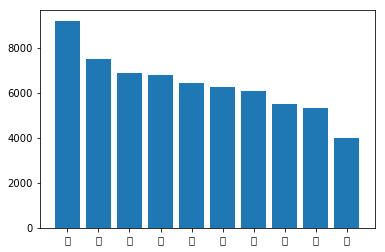

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ans_df = df_freq.sort_values(by="freq",ascending=False)[:10]
ax.bar(list(range(10)),list(ans_df["freq"]))
plt.xticks(list(range(10)),list(ans_df["word"]))
plt.show()

In [54]:
list(ans_df["word"])

['の', '。', 'て', '、', 'は', 'に', 'を', 'と', 'が', 'た']

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

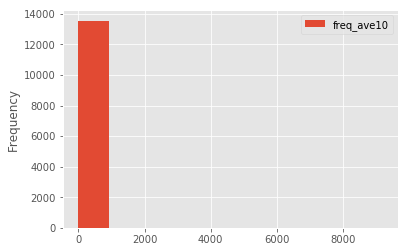

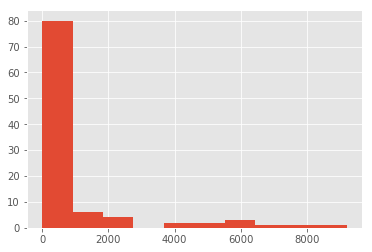

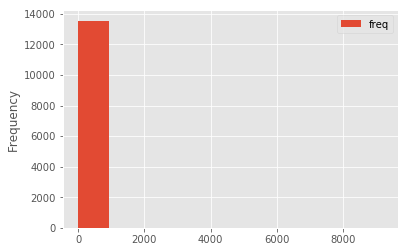

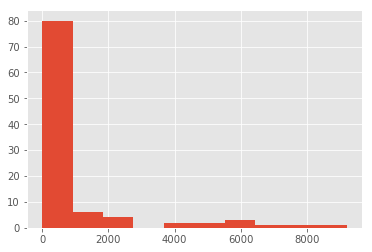

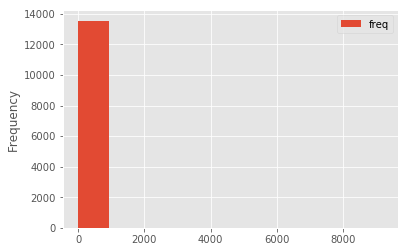

In [76]:
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(np.array(list(df_freq["freq"]))[:100])
df_freq.plot(y="freq",kind="hist")
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．



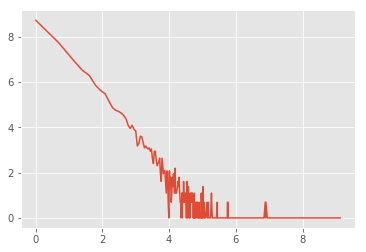

In [94]:
a = sorted(list(df_freq["freq"]))
num_dic = {}
for i in a:
    if not i in num_dic:
        num_dic[i] = 1
    else:
        num_dic[i] += 1
log_keys = np.log(np.array(list(num_dic.keys())))
log_values = np.log(np.array(list(num_dic.values())))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(log_keys,log_values,label="loglog")
plt.show()

array(['surface', 'pos', 'pos1', 'base'],
      dtype='<U7')

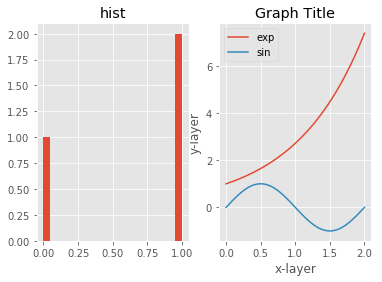

In [70]:
plt.style.use("ggplot")
fig = plt.figure()
ax = fig.add_subplot(122)
x = np.linspace(0,2.0,100)
y = np.exp(x)
z = np.sin(x * np.pi )

ax.plot(x,y,label="exp")
ax.set_xlabel("x-layer")
ax.set_ylabel("y-layer") 
ax.plot(x,z,label="sin")
ax.set_title("Graph Title")
ax.legend()
bx = fig.add_subplot(121)
bx.hist([0,1,1],label="sinhist",bins=20)
bx.set_title("hist")
plt.show()